<a href="https://colab.research.google.com/github/bilychka-v/numeric_methods/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Введіть початкове наближення для x: 0.5
Введіть початкове наближення для y: 0.5
Введіть початкове наближення для z: -1
Введіть значення точності (ε): 1e-6
Ітерація 0: x = 0.5, y = 0.5, z = -1.0, точність = 0.5
Ітерація 1: x = 0.4166666666666667, y = 0.4166666666666667, z = -0.8333333333333334, точність = 0.04166666666666674
Ітерація 2: x = 0.4097222222222222, y = 0.4097222222222222, z = -0.8194444444444444, точність = 0.00723379629629628
Ітерація 3: x = 0.4085165895061728, y = 0.4085165895061728, z = -0.8170331790123456, точність = 0.0013148234105293533
Ітерація 4: x = 0.4082974522710846, y = 0.4082974522710846, z = -0.8165949045421692, точність = 0.00024085718635147302
Ітерація 5: x = 0.4082573094066927, y = 0.4082573094066927, z = -0.8165146188133854, точність = 4.418410395201633e-05
Ітерація 6: x = 0.4082499453893674, y = 0.4082499453893674, z = -0.8164998907787347, точність = 8.107462528661458e-06
Ітерація 7: x = 0.4082485941456126, y = 0.4082485941456126, z = -0.8164971882912252, 

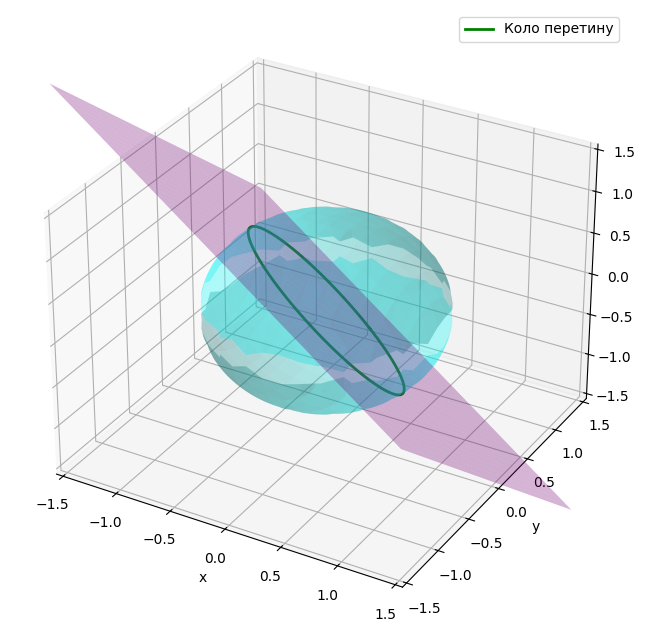

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Визначення рівнянь
def f1(x, y, z):
    return x**2 + y**2 + z**2 - 1  # Сфера

def f2(x, y, z):
    return x + y + z  # Площина

# Вектор функцій
def F(x, y, z):
    return [f1(x, y, z), f2(x, y, z)]

# Якобі матриця
def jacobi(x, y, z):
    return [
        [2 * x, 2 * y, 2 * z],
        [1, 1, 1]
    ]

# Функція для обчислення норми вектора
def vector_norm(v):
    return sum(v_i**2 for v_i in v) ** 0.5

# Функція для обчислення векторного добутку
def vector_cross(v1, v2):
    return [
        v1[1] * v2[2] - v1[2] * v2[1],
        v1[2] * v2[0] - v1[0] * v2[2],
        v1[0] * v2[1] - v1[1] * v2[0]
    ]

# Функція для транспонування матриці
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

# Функція для множення двох матриць
def multiply_matrices(a, b):
    if len(a[0]) != len(b):
        raise ValueError("Матриці мають несумісні розміри для множення.")
    return [
        [
            sum(a[i][k] * b[k][j] for k in range(len(b)))
            for j in range(len(b[0]))
        ]
        for i in range(len(a))
    ]

# Функція для обчислення псевдооберненої матриці методом A^T (A A^T)^{-1}
def pseudo_inverse(a):
    A_T = transpose(a)  # Транспонована матриця (3x2)
    A_A_T = multiply_matrices(a, A_T)  # A * A^T (2x2)

    # Обчислення детермінанти матриці A_A_T
    det = A_A_T[0][0] * A_A_T[1][1] - A_A_T[0][1] * A_A_T[1][0]
    if abs(det) < 1e-10:
        raise ValueError("Матриця A * A^T вироджена і не може бути інвертована.")

    # Обчислення оберненої матриці A_A_T^{-1}
    inv_A_A_T = [
        [ A_A_T[1][1] / det, -A_A_T[0][1] / det ],
        [ -A_A_T[1][0] / det, A_A_T[0][0] / det ]
    ]

    # Обчислення псевдооберненої матриці A^+
    A_pseudo_inv = multiply_matrices(A_T, inv_A_A_T)  # (3x2) * (2x2) = (3x2)
    return A_pseudo_inv

# Модифікований метод Ньютона
def modified_newton_method_fixed_jacobian(x0, y0, z0, tol=1e-6, max_iter=100):
    """
    Реалізація модифікованого методу Ньютона з фіксованою Якобі-матрицею.
    """
    x, y, z = x0, y0, z0

    # Обчислення фіксованої Якобі-матриці на початку
    J = jacobi(x, y, z)
    try:
        J_inv = pseudo_inverse(J)  # Псевдообернена матриця
    except ValueError as e:
        print(f"Помилка при обчисленні псевдооберненої матриці: {e}")
        return None

    for iteration in range(max_iter):
        F_val = F(x, y, z)
        accuracy = vector_norm(F_val)
        print(f"Ітерація {iteration}: x = {x}, y = {y}, z = {z}, точність = {accuracy}")

        if accuracy < tol:
            print(f"Знайдено розв'язок: x = {x}, y = {y}, z = {z} за {iteration} ітерацій")
            return x, y, z

        # Обчислення поправки: delta = -J_inv * F_val
        delta = [
            -sum(J_inv[i][k] * F_val[k] for k in range(len(F_val)))
            for i in range(len(J_inv))
        ]

        # Оновлення змінних
        x, y, z = x + delta[0], y + delta[1], z + delta[2]

    print("Розв'язок не знайдено за вказану кількість ітерацій.")
    return None

# Знаходження кола перетину
def get_circle_of_intersection():
    # Нормаль площини
    normal = [1, 1, 1]
    norm_length = vector_norm(normal)
    normal = [n / norm_length for n in normal]

    # Центр сфери
    center_sphere = [0, 0, 0]

    # Ортогональна проєкція центру сфери на площину
    dot_product = sum(center_sphere[i] * normal[i] for i in range(3))
    center_projection = [
        center_sphere[i] - dot_product * normal[i] for i in range(3)
    ]

    # Радіус кола перетину
    radius = (1 - sum(c**2 for c in center_projection)) ** 0.5

    # Генерація векторів для кола в площині
    v1 = vector_cross(normal, [1, 0, 0])
    if vector_norm(v1) == 0:
        v1 = vector_cross(normal, [0, 1, 0])
    v1_norm = vector_norm(v1)
    v1 = [v / v1_norm for v in v1]

    v2 = vector_cross(normal, v1)

    # Параметризація кола
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = [
        center_projection[0] + radius * (v1[0] * np.cos(t) + v2[0] * np.sin(t))
        for t in theta
    ]
    circle_y = [
        center_projection[1] + radius * (v1[1] * np.cos(t) + v2[1] * np.sin(t))
        for t in theta
    ]
    circle_z = [
        center_projection[2] + radius * (v1[2] * np.cos(t) + v2[2] * np.sin(t))
        for t in theta
    ]

    return circle_x, circle_y, circle_z

# Графік поверхонь
def plot_surfaces():
    x = np.linspace(-1.5, 1.5, 200)
    y = np.linspace(-1.5, 1.5, 200)
    x, y = np.meshgrid(x, y)

    # Обчислюємо z для сфери та площини
    z_sphere_positive = np.sqrt(np.maximum(0, 1 - x**2 - y**2))
    z_sphere_negative = -np.sqrt(np.maximum(0, 1 - x**2 - y**2))

    valid_mask = (x**2 + y**2 <= 1)
    z_sphere_positive[~valid_mask] = np.nan
    z_sphere_negative[~valid_mask] = np.nan

    z_plane = -x - y

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Графік сфери
    ax.plot_surface(x, y, z_sphere_positive, color='cyan', alpha=0.3, rstride=10, cstride=10)
    ax.plot_surface(x, y, z_sphere_negative, color='cyan', alpha=0.3, rstride=10, cstride=10)

    # Графік площини
    ax.plot_surface(x, y, z_plane, color='magenta', alpha=0.3)

    # Коло перетину
    circle_x, circle_y, circle_z = get_circle_of_intersection()
    ax.plot(circle_x, circle_y, circle_z, color='green', linewidth=2, label="Коло перетину")

    # Налаштування діапазонів осей
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    ax.legend()
    plt.show()

# Ввід початкових значень від користувача
try:
    x0 = float(input("Введіть початкове наближення для x: "))
    y0 = float(input("Введіть початкове наближення для y: "))
    z0 = float(input("Введіть початкове наближення для z: "))
    epsilon = float(input("Введіть значення точності (ε): "))

    solution = modified_newton_method_fixed_jacobian(x0, y0, z0, tol=epsilon)

    if solution:
        plot_surfaces()
except ValueError:
    print("Введено некоректні значення.")
